# Exploring Word2Vec

## Definition

Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct **linguistic contexts** of words. Here lingustic contexts are represented as vector spaces. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space. --[Wikipedia](https://en.wikipedia.org/wiki/Word2vec)

## Using the simplified Word2Vec Model

In [1]:
# set up our environment
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [3]:
# initialize our embedding model
model = pd.read_pickle('word2vec.pkl')
print("Our model has {} words and {} dimensions.".format(model.shape[0],model.shape[1]))

Our model has 156542 words and 300 dimensions.


As we said above, in these embedding models each word is represented as a vector. Let's just peek at what kind of words are in our model,

In [4]:
words = list(model.index)
print("Some example words in the model: {}"\
        .format(words[30:35]))

Some example words in the model: ['year', 'were', 'we', 'more', 'up']


Now, let's do the [classic example](https://www.technologyreview.com/s/541356/king-man-woman-queen-the-marvelous-mathematics-of-computational-linguistics) of 'king - man + woman = queen',

In [5]:
# look up the vectors in our model
queen = model.loc['queen']
king = model.loc['king']
man = model.loc['man']
woman = model.loc['woman']

# compute the vector for 'female king'
female_king = king - man + woman

# now check if 'female king' is more similar to queen than king is
sim = cosine_similarity([female_king,king],[queen])

print("Similarity between 'female king' and 'queen' = {}".format(sim[0,0]))
print("Similarity between 'king' and 'queen' = {}".format(sim[1,0]))

Similarity between 'female king' and 'queen' = 0.7300517409077553
Similarity between 'king' and 'queen' = 0.6510956835386663


Indeed, 'female king' is more similar to 'queen' than 'king' is.  This clearly shows that these embedding vectors capture some notion of semantics/meaning of the words.

Let's try another example: cacao + milk = chocolate

In [6]:
# look up the vectors
cacao = model.loc['cacao']
milk = model.loc['milk']
chocolate = model.loc['chocolate']

# compute the vector for cocao beverage
bev = cacao + milk

# now check if the resulting beverage is similar to chocolate...
sim = cosine_similarity([bev,cacao,milk],[chocolate])

print("Similarity between 'cacao+milk' and 'chocolate' = {}".format(sim[0,0]))
print("Similarity between 'cacao' and 'chocolate' = {}".format(sim[1,0]))
print("Similarity between 'milk' and 'chocolate' = {}".format(sim[2,0]))

Similarity between 'cacao+milk' and 'chocolate' = 0.63322493583682
Similarity between 'cacao' and 'chocolate' = 0.5436312732293445
Similarity between 'milk' and 'chocolate' = 0.5012687069537886


We see that 'cacao+milk' is more similar to chocolate than 'cacao' or 'milk' on their own.

## Visualizing Word Embedding Vectors

In order to visualize the vectors we will take the 300 dimensional space of the orginal model and project it onto a 2D space using Principle Component Analysis (PCA).  Now each word in our reduced model is represented by a vector in 2D space and therefore we can easily plot those vectors.  One caveat is that we will probably have lost many semantic nuances going from a 300D model to a 2D model but the major semantic concepts are still preserved.

In [7]:
# reduce our embedding model to 2D
pca = PCA(n_components=2)
model2D = pd.DataFrame(pca.fit_transform(model),index=model.index)
r,c = model2D.shape
print("Our reduced model has {} words and {} dimensions".format(r,c))

Our reduced model has 156542 words and 2 dimensions


Putting our reduced model to work. The picture below shows the words *king* (blue arrow), *queen* (red arrow), *man* (green arrow), and *woman* (black arrow) being embedded in our 2-dimensional vector space representing linguistic contexts.

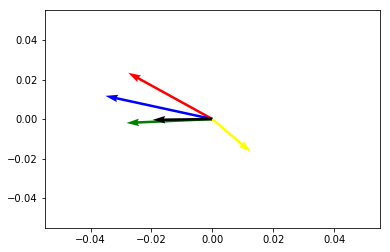

In [11]:
# look up the vectors in our model
queen = model2D.loc['queen']
king = model2D.loc['king']
man = model2D.loc['man']
woman = model2D.loc['woman']
oil = model2D.loc['oil']

# plot the vectors
plt.quiver(0, 0, queen[0], queen[1], color='red',angles='xy', scale_units='xy', scale=20)
plt.quiver(0, 0, king[0], king[1], color='blue',angles='xy', scale_units='xy', scale=20)
plt.quiver(0, 0, man[0], man[1], color='green',angles='xy', scale_units='xy', scale=20)
plt.quiver(0, 0, woman[0], woman[1], color='black',angles='xy', scale_units='xy', scale=20)
plt.quiver(0, 0, oil[0], oil[1], color='yellow',angles='xy', scale_units='xy', scale=20)
plt.show()

Notice that words that typically appear in similar contexts such as king, queen, man, and woman appear close to each other in that space.  Whereas unrelated concepts such as 'oil' are further away. That is precisely the property that word embeddings exploit.  

Now let's redo the classic example 'female_king = king - man + woman' and look at the vectors,

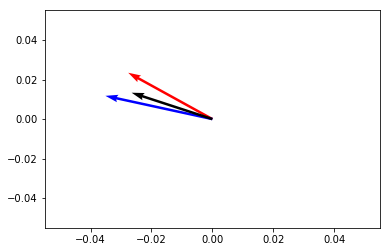

In [12]:
female_king = king - man + woman

plt.quiver(0, 0, queen[0], queen[1], color='red',angles='xy', scale_units='xy', scale=20)
plt.quiver(0, 0, king[0], king[1], color='blue',angles='xy', scale_units='xy', scale=20)
plt.quiver(0, 0, female_king[0], female_king[1], color='black',angles='xy', scale_units='xy', scale=20)
plt.show()

We can see that the black 'female_king' arrow is closer to the red 'queen' arrow than the 'king' arrow is, as we expected.  But what this visualization also shows is that if we compare 'female_king' to both 'king' and 'queen' we find that it is still more similar to 'king' than to 'queen'.  Something perhaps a bit surprising.

Let's visualize our second experiment with 'cacao' and 'chocolate',

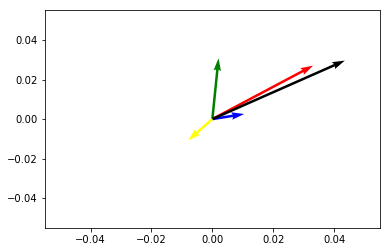

In [18]:
# look up the vectors in our model
cacao = model2D.loc['cacao']
milk = model2D.loc['milk']
chocolate = model2D.loc['chocolate']
car = model2D.loc['car']

# compute the beverage
bev = cacao + milk

# plot the vectors
plt.quiver(0, 0, cacao[0], cacao[1], color='red',angles='xy', scale_units='xy', scale=20)
plt.quiver(0, 0, milk[0], milk[1], color='blue',angles='xy', scale_units='xy', scale=20)
plt.quiver(0, 0, chocolate[0], chocolate[1], color='green',angles='xy', scale_units='xy', scale=20)
plt.quiver(0, 0, bev[0], bev[1], color='black',angles='xy', scale_units='xy', scale=20)
plt.quiver(0, 0, car[0], car[1], color='yellow',angles='xy', scale_units='xy', scale=20)
plt.show()

Here, unfortunately, our projection of the 300D space onto the 2D space distored things a bit, our nice equation no longer holds, instead, 'cacao' is more similar to 'chocolate' than 'cacao+milk'.  However, that major concepts are still preserved can be seen when we introduce a completely unrelated concept such as car as can be seen below,

In [20]:
# now check if the resulting beverage is similar to chocolate...
sim = cosine_similarity([bev,cacao,milk,car],[chocolate])

print("Similarity between 'cacao+milk' and 'chocolate' = {}".format(sim[0,0]))
print("Similarity between 'cacao' and 'chocolate' = {}".format(sim[1,0]))
print("Similarity between 'milk' and 'chocolate' = {}".format(sim[2,0]))
print("Similarity between 'car' and 'chocolate' = {}".format(sim[3,0]))

Similarity between 'cacao+milk' and 'chocolate' = 0.615416140464139
Similarity between 'cacao' and 'chocolate' = 0.682305171398306
Similarity between 'milk' and 'chocolate' = 0.3013219321488682
Similarity between 'car' and 'chocolate' = -0.8422920121127222


Here 'car' is almost as unrelated to 'chocolate' as possible.